<a href="https://colab.research.google.com/github/ParvathiPillai/classroom-git/blob/master/26g.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:


#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#deep learning model
from tensorflow.keras.models import Sequential  #This is the simplest way to build a neural network. You can stack layers in sequence, which is good for most standard deep learning tasks.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#Dense: These are fully connected layers. In a fully connected layer, every neuron is connected to every other neuron in the next layer.
#Dropout: This layer helps prevent overfitting by randomly "dropping" (ignoring) some neurons during training.
#BatchNormalization: This normalizes the activations of neurons, which helps speed up the learning process and makes training more stable.
from tensorflow.keras.optimizers import Adam #adjusts the learning rate as the model trains, making the training process faster and more efficient.
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.ensemble import RandomForestRegressor #a traditional machine learning algorithm that creates multiple decision trees and then combines their predictions (ensemble learning).
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
#MSE: Measures how close the predictions are to the actual values. Smaller is better.
#MAE: Similar to MSE but measures the average of the absolute errors.
#R² score: Measures how well the predictions match the actual values, with 1 being a perfect fit and 0 meaning the model isn’t predicting better than random guessing.


# Data Preprocessing:
# Splitting the data into training and test sets.
# Scaling the numerical data and encoding the categorical data (if any).

# Deep Learning:
# Building a neural network model with dense, dropout, and batch normalization layers.
# Using regularization and callbacks to improve the training process.
# Optimizing the model using the Adam optimizer.

# Machine Learning (Random Forest):
# Applying Random Forest Regressor for prediction (this is separate from the deep learning model).
# Evaluating the performance using metrics like MSE, MAE, and R² score.

# Visualization:
# Plotting graphs to visualize model performance, typically used to see trends or compare predicted vs actual values.



In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, regularizers


# Load and preprocess data
df = pd.read_csv('Quality_of_Service_5G[1].csv')
df

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%


In [13]:
# Preprocess 'Signal_Strength' column
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(float)

# Preprocess 'Latency' column
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(float)

In [14]:
def convert_bandwidth(value):
    if 'Kbps' in value:
        return float(value.replace(' Kbps', '')) / 1000  # Convert Kbps to Mbps
    elif 'Mbps' in value:
        return float(value.replace(' Mbps', ''))
    else:
        return float(value)

In [15]:
df['Required_Bandwidth'] = df['Required_Bandwidth'].apply(convert_bandwidth)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].apply(convert_bandwidth)

In [16]:
le = LabelEncoder()
df['Application_Type'] = le.fit_transform(df['Application_Type'])

In [17]:
df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%', '').astype(float) / 100  # Convert percentage to float

# Prepare the features and target variable
X = df.drop(['Timestamp', 'User_ID', 'Resource_Allocation'], axis=1)
y = df['Resource_Allocation']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.models import Sequential
#The model is built as a sequence of layers, where each layer's output is the input to the next. This is appropriate for most simple, feed-forward neural networks.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

#This is a binary classification model that takes some input data (probably related to a machine learning problem) and outputs a probability between 0 and 1, which can be used to classify the input into one of two categories.

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])


#The number of neurons is reduced in each layer, which is a common technique to encourage the model to compress the information and focus on the most relevant patterns.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

#MSE measures the average of the squares of the differences between the actual and predicted values.

In [21]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/100))

In [22]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, verbose=1 )


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.4850 - mae: 0.3744 - val_loss: 0.5067 - val_mae: 0.4480
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4038 - mae: 0.2902 - val_loss: 0.4809 - val_mae: 0.4312
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3459 - mae: 0.2077 - val_loss: 0.2885 - val_mae: 0.1122
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3061 - mae: 0.1610 - val_loss: 0.2824 - val_mae: 0.1223
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2821 - mae: 0.1271 - val_loss: 0.2758 - val_mae: 0.1271
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2688 - mae: 0.1131 - val_loss: 0.2655 - val_mae: 0.1179
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2608 - mae: 0.1128 - val_loss: 0.2566 - val_mae: 0.1088
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2515 - mae: 0.1119 - val_loss: 0.2479 - val_mae: 0.1058
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2417 - mae: 0.1009

In [23]:
predictions = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [24]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0013083977455040177


In [25]:
predictions = model.predict(X_test)


mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')


r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Absolute Error (MAE): 0.024279966354370117
R-squared: 0.8506754835499851


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


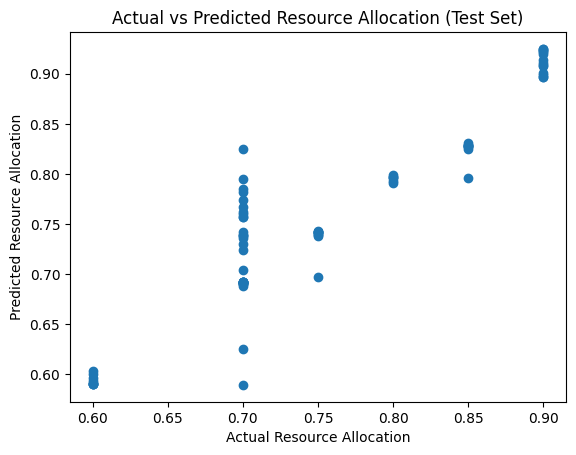

In [26]:
test_predictions = model.predict(X_test)

# Create a scatter plot for the test set
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Resource Allocation')
plt.ylabel('Predicted Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.show()

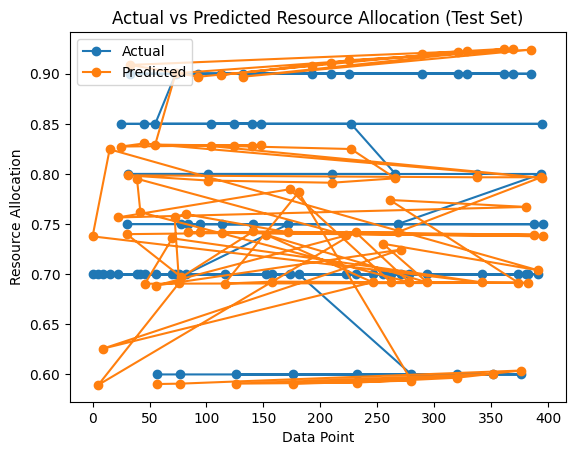

In [27]:
# Create a DataFrame with actual and predicted values for the test set
# If test_predictions is a 2D array, flatten it
test_predictions = test_predictions.flatten()
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

# Sort the DataFrame by actual values for better visualization
comparison_df = comparison_df.sort_values(by='Actual')

# Plot a line chart
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='o')
plt.xlabel('Data Point')
plt.ylabel('Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()

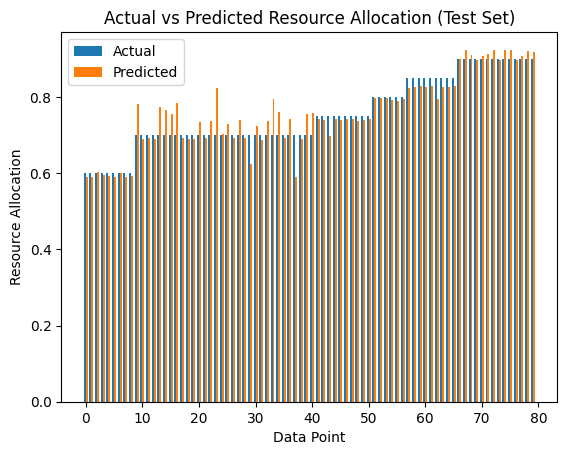

In [28]:
# Create an array for the x-axis (data point indices)
x_indices = np.arange(len(comparison_df))

# Plot a bar chart
width = 0.35  # width of the bars
plt.bar(x_indices - width/2, comparison_df['Actual'], width, label='Actual')
plt.bar(x_indices + width/2, comparison_df['Predicted'], width, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  #prevents overfitting, stops early for a set of epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)  #gives more precise updates




In [30]:
# Updated Learning Rate Schedule
initial_lr = 0.001
lr_schedule = ExponentialDecay(
    initial_lr,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)


In [31]:
# Model with ExponentialDecay learning rate
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping

# Define the learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)


In [33]:
# Compile model with Adam optimizer using the learning rate schedule
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error', metrics=['mae'])


In [34]:

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [46]:
# Train the model (without ReduceLROnPlateau)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092 - mae: 0.0406 - val_loss: 0.0087 - val_mae: 0.0417
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073 - mae: 0.0277 - val_loss: 0.0086 - val_mae: 0.0403
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mae: 0.0311 - val_loss: 0.0084 - val_mae: 0.0386
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mae: 0.0328 - val_loss: 0.0083 - val_mae: 0.0370
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mae: 0.0321 - val_loss: 0.0081 - val_mae: 0.0356
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - mae: 0.0314 - val_loss: 0.0080 - val_mae: 0.0341
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - mae: 0.0316 - val_loss: 0.0078 - val_mae: 0.0324
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - mae: 0.0314 - val_loss: 0.0076 - val_mae: 0.0307
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075 - mae: 0.0292 

In [47]:
# Make predictions and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 0.0006778978303990095
Mean Absolute Error (MAE): 0.015728322118520727
R-squared: 0.9226330325967873


In [49]:

# Visualize Actual vs Predicted
test_predictions = predictions.flatten()
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})
comparison_df = comparison_df.sort_values(by='Actual')


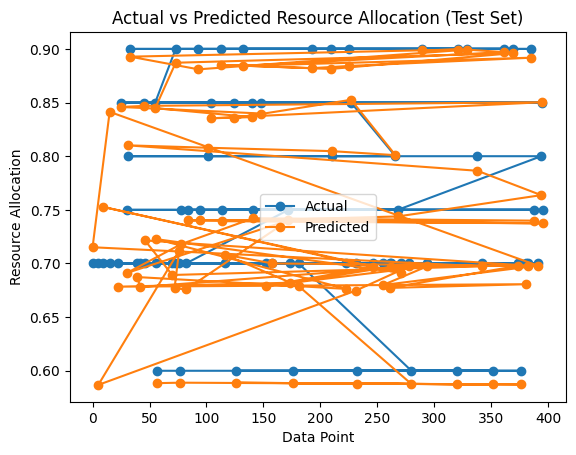

In [51]:
# Line chart for Actual vs Predicted
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='o')
plt.xlabel('Data Point')
plt.ylabel('Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()

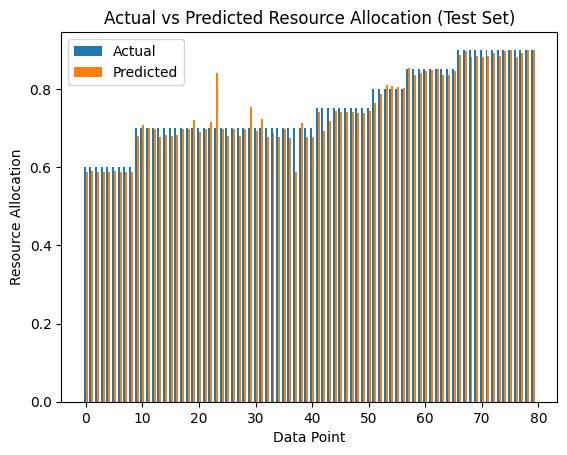

In [52]:
# Bar chart for Actual vs Predicted
x_indices = np.arange(len(comparison_df))
width = 0.35
plt.bar(x_indices - width/2, comparison_df['Actual'], width, label='Actual')
plt.bar(x_indices + width/2, comparison_df['Predicted'], width, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()

In [53]:
# Define the custom loss function
def resource_allocation_loss(y_true, y_pred):
  """
  Custom loss function for resource allocation.
  You need to define the logic of your loss function here.
  This is just an example.

  Args:
    y_true: True values.
    y_pred: Predicted values.

  Returns:
    The calculated loss.
  """
  # Example: Mean Squared Error
  return tf.reduce_mean(tf.square(y_true - y_pred))
  # Replace with your desired logic


# Recompile the model with the custom loss function
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss=resource_allocation_loss, metrics=['mae'])

In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model with a fixed learning rate for Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=['mae'])

# Define EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0052 - mae: 0.0306 - val_loss: 0.0088 - val_mae: 0.0465 - learning_rate: 0.0010
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mae: 0.0274 - val_loss: 0.0058 - val_mae: 0.0406 - learning_rate: 0.0010
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mae: 0.0312 - val_loss: 0.0109 - val_mae: 0.0600 - learning_rate: 0.0010
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mae: 0.0339 - val_loss: 0.0041 - val_mae: 0.0265 - learning_rate: 0.0010
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mae: 0.0318 - val_loss: 0.0095 - val_mae: 0.0524 - learning_rate: 0.0010
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mae: 0.0331 - val_loss: 0.0059 - val_mae: 0.0387 - learning_rate: 0.0010
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - mae: 0.0289 - val_loss: 0.0092 - val_mae: 0.0493 - learning_rate: 0.0010
Epoch 8/500
8/8 ━━━━━━━━━

In [56]:
# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 0.0006661094307240421
Mean Absolute Error (MAE): 0.016093179285526286
R-squared: 0.9239784163588985


In [57]:
# Visualize Actual vs Predicted
test_predictions = predictions.flatten()
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})
comparison_df = comparison_df.sort_values(by='Actual')

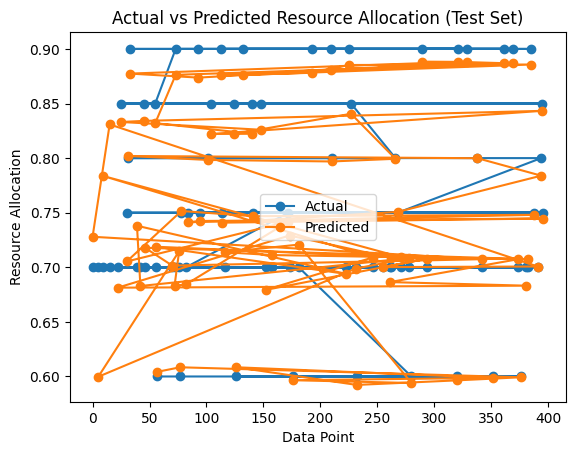

In [58]:
# Line chart for Actual vs Predicted
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='o')
plt.xlabel('Data Point')
plt.ylabel('Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()

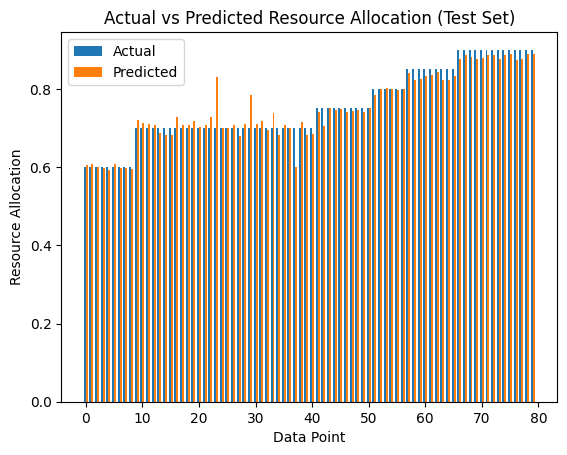

In [59]:
# Bar chart for Actual vs Predicted
x_indices = np.arange(len(comparison_df))
width = 0.35
plt.bar(x_indices - width/2, comparison_df['Actual'], width, label='Actual')
plt.bar(x_indices + width/2, comparison_df['Predicted'], width, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()

In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,741 (143.52 KB)

 Trainable params: 12,097 (47.25 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 24,196 (94.52 KB)